In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from matplotlib import pyplot as plt
from src.test import Tester

In [20]:
import numpy as np
from PIL import Image

In [21]:
from src.datasets import ALOVDataset

In [5]:
from torchvision import transforms

In [23]:
from src.helper import FromTensor, ToTensor, Normalize, show_batch

In [7]:
%matplotlib inline

In [52]:
model_weights ='/home/devyhia/model_best_loss.pth'
save_directory = ''
data_directory ='~/vot-toolkit/tum-workspace/sequences/ball/*.jpg'
data_directory = '/home/devyhia/ALOV/Frames/01-Light/01-Light_video00001/*.jpg'

In [24]:
transform = transforms.Compose([Normalize(), ToTensor()])
alov = ALOVDataset('../ALOV/Frames/',
                            '../ALOV/GT/',
                            transform)

OSError: [Errno 2] No such file or directory: '../ALOV/GT/'

In [25]:
from_tensor = FromTensor()

In [48]:
img = Image.open('/home/devyhia/ALOV/Frames/01-Light/01-Light_video00001/00000001.jpg')

In [49]:
ann = '1 1080.2 187.84 1012.9 187.84 1012.9 269.56 1080.2 269.56'
ann = ann.strip().split(' ')
left = min(float(ann[1]), float(ann[3]), float(ann[5]), float(ann[7]))
top = min(float(ann[2]), float(ann[4]), float(ann[6]), float(ann[8]))
right = max(float(ann[1]), float(ann[3]), float(ann[5]), float(ann[7]))
bottom = max(float(ann[2]), float(ann[4]), float(ann[6]), float(ann[8]))
init_box = [left, top, right, bottom]

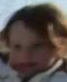

In [50]:
img.crop(init_box)

In [69]:
tester = Tester(data_directory, model_weights, np.array(init_box).astype(float), save_directory, ignore_gpu=True)

In [70]:
len(tester.x)

71

In [71]:
tester.prev_rect = tester.init_bbox
tester.anim_idx = 0

In [63]:
tester.model.eval()

GoNet(
  (features): Sequential(
    (0): Conv2d (3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d (64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d (192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d (384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential(
    (0): Linear(in_features=18432, out_features=4096)
    (1): ReLU(inplace)
    (2): Dropout(p=0.1)
    (3): Linear(in_features=4096, out_features=4096)
    (4): ReLU(inplace)
    (5): Dropout(p=0.1)
    (6): Linear

In [ ]:
tester.test(animated=False)

Testing frame # 3


In [95]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())

In [96]:
display_animation(tester.animated_test())

Testing frame # 1
Testing frame # 2
Testing frame # 3


ValueError: not enough values to unpack (expected 2, got 0)

# VOT 2014 Challenge

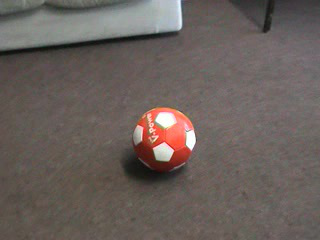

In [12]:
Image.open('../vot-toolkit/tum-workspace/sequences/ball/00000112.jpg')